In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("sajib.csv")
df

,Date,Starting,Ending
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700
5,01.08.23,16800,16400
6,01.07.23,15900,16200
7,01.06.23,15800,15500
8,01.05.23,16150,16100
9,01.04.23,16300,15800


In [3]:
df.head()

,Date,Starting,Ending
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700


In [4]:
df.isnull().sum()

Date        0
Starting    0
Ending      0
dtype: int64

In [5]:
df1=df.drop('Date',axis=1)
df1

## Or
## df1=df.drop(columns=['Dtae'])

,Starting,Ending
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700
5,16800,16400
6,15900,16200
7,15800,15500
8,16150,16100
9,16300,15800


In [6]:
df1.head()

,Starting,Ending
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700


Text(0.5, 1.0, 'Stock price')

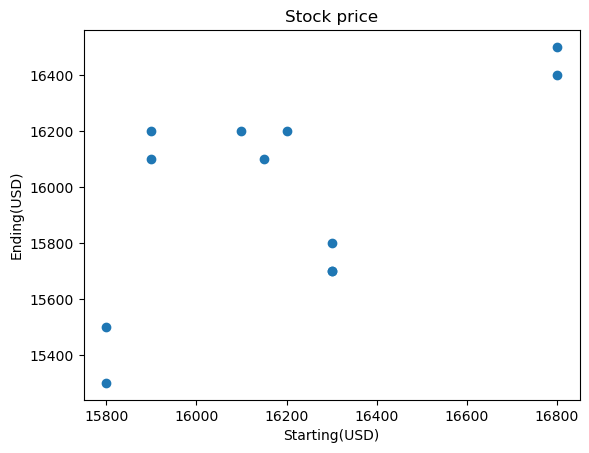

In [7]:
plt.scatter(df1['Starting'],df1['Ending'])
plt.xlabel('Starting(USD)')
plt.ylabel('Ending(USD)')
plt.title('Stock price')

In [8]:
x=df1.drop('Ending',axis=1)
x


,Starting
0,16800
1,15900
2,15800
3,16100
4,16300
5,16800
6,15900
7,15800
8,16150
9,16300


In [9]:
y=df[['Ending']]
y

,Ending
0,16500
1,16100
2,15300
3,16200
4,15700
5,16400
6,16200
7,15500
8,16100
9,15800


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
reg=LinearRegression()

In [12]:
x.mean()

Starting    16195.833333
dtype: float64

In [13]:
y.mean()

Ending    15975.0
dtype: float64

Text(0.5, 1.0, 'Stock price')

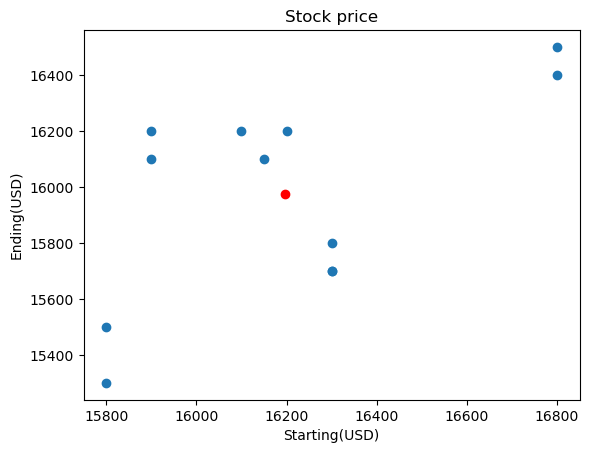

In [14]:
plt.scatter(x.mean(),y.mean(),color='red')
plt.scatter(df1['Starting'],df1['Ending'])
plt.xlabel('Starting(USD)')
plt.ylabel('Ending(USD)')
plt.title('Stock price')

In [15]:
reg.fit(x,y) ##train the model

LinearRegression()

In [16]:
m=reg.coef_
m

array([[0.65258293]])

In [17]:
c=reg.intercept_
c

array([5405.87555702])

In [ ]:
## y=mx+c


In [18]:
m*16700+c

array([[16304.0105628]])

In [19]:
reg.predict([[16700]])

D:\plant_pathology\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16304.0105628]])

In [27]:
df1['predicted']=reg.predict(x)
df1

,Starting,Ending,predicted_y,lose,predicted
0,16800,16500,16369.268856,130.731144,16369.268856
1,15900,16100,15781.944215,318.055785,15781.944215
2,15800,15300,15716.685922,-416.685922,15716.685922
3,16100,16200,15912.460802,287.539198,15912.460802
4,16300,15700,16042.977389,-342.977389,16042.977389
5,16800,16400,16369.268856,30.731144,16369.268856
6,15900,16200,15781.944215,418.055785,15781.944215
7,15800,15500,15716.685922,-216.685922,15716.685922
8,16150,16100,15945.089949,154.910051,15945.089949
9,16300,15800,16042.977389,-242.977389,16042.977389


Text(0.5, 1.0, 'Stock price')

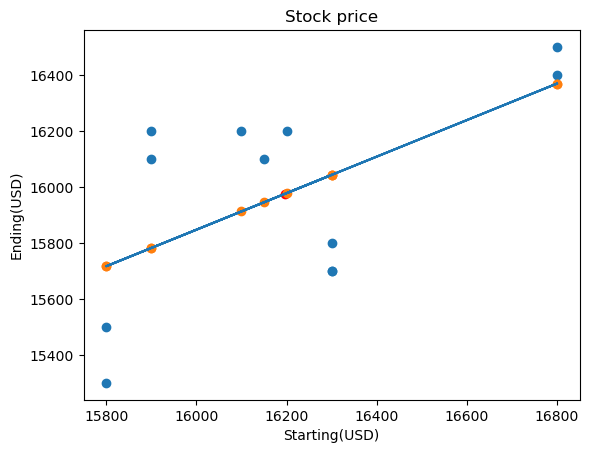

In [40]:
plt.plot(x,reg.predict(x))
plt.scatter(x.mean(),y.mean(),color='red')
plt.scatter(df1['Starting'],df1['Ending'])
plt.scatter(df1['Starting'],df1['predicted'])
plt.xlabel('Starting(USD)')
plt.ylabel('Ending(USD)')
plt.title('Stock price')

In [28]:
df1["lose"]=df1["Ending"]-df1["predicted"]
df1

,Starting,Ending,predicted_y,lose,predicted
0,16800,16500,16369.268856,130.731144,16369.268856
1,15900,16100,15781.944215,318.055785,15781.944215
2,15800,15300,15716.685922,-416.685922,15716.685922
3,16100,16200,15912.460802,287.539198,15912.460802
4,16300,15700,16042.977389,-342.977389,16042.977389
5,16800,16400,16369.268856,30.731144,16369.268856
6,15900,16200,15781.944215,418.055785,15781.944215
7,15800,15500,15716.685922,-216.685922,15716.685922
8,16150,16100,15945.089949,154.910051,15945.089949
9,16300,15800,16042.977389,-242.977389,16042.977389


In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
from sklearn.metrics import mean_absolute_error

In [46]:
mse= mean_squared_error(df1['Ending'],df1['predicted'])
mse

80411.23397700385

In [35]:
mae=mean_absolute_error(df1['Ending'],df1['predicted'])
mae

260.3840017604666

In [41]:
reg.score(x,y)

0.3577804940272571

In [42]:
from sklearn.metrics import r2_score

In [45]:
r2_score(y,reg.predict(x))

0.3577804940272571